In [10]:
%load_ext autoreload
%autoreload 2

 # Setup

## Directories

In [11]:
import sys
directories = sys.path
print("Python está buscando en los siguientes directorios:")
for directory in directories:
    print(directory)

Python está buscando en los siguientes directorios:
C:\Users\ingah\miniforge3\python310.zip
C:\Users\ingah\miniforge3\DLLs
C:\Users\ingah\miniforge3\lib
C:\Users\ingah\miniforge3

C:\Users\ingah\miniforge3\lib\site-packages
C:\Users\ingah\PyANM
C:\Users\ingah\pycode
C:\Users\ingah\miniforge3\lib\site-packages\win32
C:\Users\ingah\miniforge3\lib\site-packages\win32\lib
C:\Users\ingah\miniforge3\lib\site-packages\Pythonwin


In [12]:
import os
current_dir = os.getcwd()
print(f"El directorio de referencia es: {current_dir}")

El directorio de referencia es: C:\Users\ingah\PyANM\jupyter_lab_validations\04_rect_tube_pen_dem_cap


## Libraries

### Third Party

In [3]:
from dataclasses import dataclass
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
import sectionproperties
from sectionproperties.pre.pre import Material as steel_material
from sectionproperties.analysis import Section
from sectionproperties.pre.library import rectangular_hollow_section

### Library tools

In [5]:
import anm_module
from anm_module.engineering.settings import StrengthReductionFactor
from anm_module.engineering.settings import Forces
from anm_module.steel_design.settings import Material
from anm_module.steel_design.settings import TubeSteelSection
from anm_module.steel_design.settings import SteelMemberDefinition
from anm_module.steel_design.rect_tube import TubeStrengthDesign

# TubeStrengthDesign

## Parameters

### Strength reduction factor

In [4]:
# ANM Ingeniería dataclass

Phi = StrengthReductionFactor(
    for_bending=0.90,
    for_compression=0.90,
    for_tension_yielding=0.90,
    for_tension_fracture=0.75,
    for_shear=0.90,
    for_torsion=0.90
)

## Materials

In [5]:
# ANM Ingeniería dataclass

SteelMaterial = Material(
    name= "JIS G-3132 SPHT-2",
    grade="Gr NA",
    weight_per_unit_volume=0.00785,
    elasticity_modulus=2100000,
    poissons_ratio=0.3,
    coefficient_of_thermal_expansion=1.170E-05,
    shear_modulus=784000,
    yield_stress=2310,
    ultimate_stress=3160,
    color="blue"
)

In [6]:
# Checking

type(SteelMaterial)

anm_module.steel_design.settings.Material

In [7]:
print(f'{SteelMaterial=}')

SteelMaterial=Material(name='JIS G-3132 SPHT-2', grade='Gr NA', weight_per_unit_volume=0.00785, elasticity_modulus=2100000, poissons_ratio=0.3, coefficient_of_thermal_expansion=1.17e-05, shear_modulus=784000, yield_stress=2310, ultimate_stress=3160, color='blue')


In [8]:
SteelMaterial

Material(name='JIS G-3132 SPHT-2', grade='Gr NA', weight_per_unit_volume=0.00785, elasticity_modulus=2100000, poissons_ratio=0.3, coefficient_of_thermal_expansion=1.17e-05, shear_modulus=784000, yield_stress=2310, ultimate_stress=3160, color='blue')

## Geometry

### Definition

In [9]:
# ANM Ingeniería dataclass

SteelGeometry = TubeSteelSection(
    name="100x100x1.80",
    section_type="cold-formed",
    outside_depth=10,
    outside_width=10,
    wall_thickness=0.180,
    shear_buckling_coefficient=5.34,
    n_divisions=5,
    color="red"
)

**Note:**
This was implemented in TubeSteelSection using section_type attribute. The outer radius of a Rectangular Hollow Section (RHS) depends on whether it is hot-formed or cold-formed:

- Hot-formed RHS: The external radius is typically (1.5t), where (t) is the wall thickness
- Cold-formed RHS: The external radius varies with the wall thickness:

    - For (t < 6) mm, the external radius is (2.0t)
    - For (6 \leq t < 10) mm, the external radius is (2.5t)
    - For (t \geq 10) mm, the external radius is (3.0t)

In [10]:
# ANM Ingeniería dataclass

Element = SteelMemberDefinition(
    element_name="E1001",
    element_length=300,
    effective_length_factor_yy=1.0,
    effective_length_factor_zz=2.0,
    shear_lag_factor=0.7,
    n_divisions=6
)

In [11]:
steel_tube_section = TubeStrengthDesign(SteelMaterial, SteelGeometry, Phi, Element)

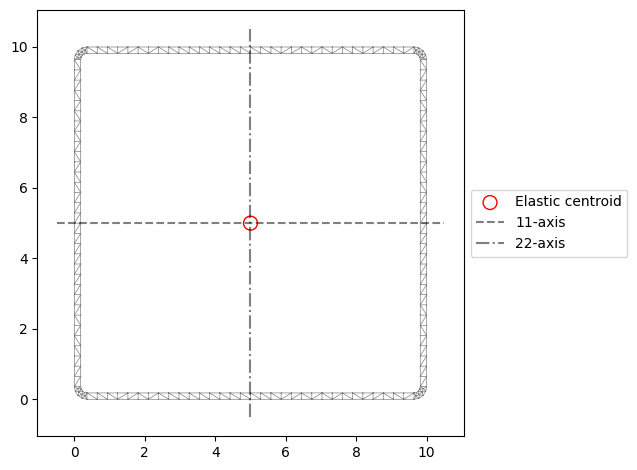

In [12]:
steel_tube_section.plotting_section_geometry()

In [13]:
steel_material = steel_tube_section.prepare_material_for_sectionproperties()
steel_section = steel_tube_section.prepare_section_for_sectionproperties()

In [14]:
print(f'{steel_material=}')
print(f'{steel_section=}')

steel_material=Material(name='JIS G-3132 SPHT-2', elastic_modulus=2100000, poissons_ratio=0.3, yield_strength=2310, density=0.00785, color='blue')
steel_section=<sectionproperties.analysis.section.Section object at 0x00000277FFD93700>


`steel_section` is now prepared to work with all the [Analysis methods](https://sectionproperties.readthedocs.io/en/latest/user_guide/analysis.html) in `sectionproperties`

In [15]:
steel_section.calculate_geometric_properties()

In [16]:
steel_section

### Geometric properties

In [17]:
cross_area_section = steel_tube_section.area()
second_moment_of_area_yy, second_moment_of_area_zz = steel_tube_section.second_moment_of_area()
elastic_section_modulus_yy, elastic_section_modulus_zz = steel_tube_section.elastic_section_modulus()
plastic_section_modulus_yy, plastic_section_modulus_zz = steel_tube_section.plastic_section_modulus()
saint_venant_torsion_constant = steel_tube_section.saint_venant_torsion_constant()
radius_of_gyration_yy, radius_of_gyration_zz = steel_tube_section.radius_of_gyration()

In [18]:
print(f'{cross_area_section=}')
print(f'{second_moment_of_area_yy=}')
print(f'{second_moment_of_area_zz=}')
print(f'{elastic_section_modulus_yy=}')
print(f'{elastic_section_modulus_zz=}')
print(f'{plastic_section_modulus_yy=}')
print(f'{plastic_section_modulus_zz=}')
print(f'{saint_venant_torsion_constant=}')
print(f'{radius_of_gyration_yy=}')
print(f'{radius_of_gyration_zz=}')

cross_area_section=6.979174637006493
second_moment_of_area_yy=111.4290357158776
second_moment_of_area_zz=111.42903571587769
elastic_section_modulus_yy=22.285807143175518
elastic_section_modulus_zz=22.285807143175518
plastic_section_modulus_yy=25.58709062106695
plastic_section_modulus_zz=25.587091940900873
saint_venant_torsion_constant=172.52485641346257
radius_of_gyration_yy=3.9957393749791947
radius_of_gyration_zz=3.995739374979196


## Capacity estimation

In [19]:
slenderness_yy, slenderness_zz = steel_tube_section.slenderness_ratio_for_compression()

In [20]:
print(f'{slenderness_yy=}')
print(f'{slenderness_zz=}')

slenderness_yy=75.07997190171145
slenderness_zz=150.15994380342283


### Tensile strength

In [21]:
phi_Tn = steel_tube_section.reduced_tension_strength()

In [22]:
print(f'La resistencia a la tensión es {phi_Tn} kgf')

La resistencia a la tensión es 11578.450722793772 kgf


### Compression strength

In [23]:
Fn = steel_tube_section.flexural_yielding_and_global_buckling_stress()
phi_Pn = steel_tube_section.reduced_compression_strength()

In [24]:
Fn
print(f'El esfuerzo nominal a compresión es {Fn[0]:.2f} kgf/cm2 contemplando pandeo alrededor del eje x-x')
print(f'El esfuerzo nominal a compresión es {Fn[1]:.2f} kgf/cm2 contemplando pandeo alrededor del eje y-y')
print(f'La resistencia nominal a compresión es {phi_Pn:.2f} kgf contemplando pandeo alrededor de ambos ejes')

El esfuerzo nominal a compresión es 1717.31 kgf/cm2 contemplando pandeo alrededor del eje x-x
El esfuerzo nominal a compresión es 806.14 kgf/cm2 contemplando pandeo alrededor del eje y-y
La resistencia nominal a compresión es 5063.57 kgf contemplando pandeo alrededor de ambos ejes


### Flexural strength

In [25]:
Fcre_yy, Fcre_zz = steel_tube_section.flexural_torsional_buckling_stress()
phi_Mn_yy, phi_Mn_zz = steel_tube_section.reduced_flexural_strength()

In [26]:
print(f'Esfuerzo para pandeo lateral torsional {Fcre_yy:.2f} kgf/cm2 alrededor del eje y-y')
print(f'Esfuerzo para pandeo lateral torsional {Fcre_zz:.2f} kgf/cm2 alrededor del eje z-z')
print(f'La resistencia a la flexión es {phi_Mn_yy:.2f} kgf-cm')
print(f'La resistencia a la flexión es {phi_Mn_zz:.2f} kgf-cm')

Esfuerzo para pandeo lateral torsional 41798.72 kgf/cm2 alrededor del eje y-y
Esfuerzo para pandeo lateral torsional 83597.43 kgf/cm2 alrededor del eje z-z
La resistencia a la flexión es 53195.56 kgf-cm
La resistencia a la flexión es 53195.56 kgf-cm


### Shear strength

In [27]:
vcr_yy, vcr_zz = steel_tube_section.shear_critical_stress()
phi_vn_yy, phi_vn_zz = steel_tube_section.reduced_shear_strength()

0.9
2244.6825643538914
2.9633042087215227


In [28]:
print(f'Esfuerzo para pandeo por cortante {vcr_yy:.2f} kgf/cm2')
print(f'Esfuerzo para pandeo por cortante {vcr_zz:.2f} kgf/cm2')
print(f'La resistencia al cortante es {phi_vn_yy:.2f} kgf')
print(f'La resistencia al cortante es {phi_vn_zz:.2f} kgf')

Esfuerzo para pandeo por cortante 3283.85 kgf/cm2
Esfuerzo para pandeo por cortante 3283.85 kgf/cm2
La resistencia al cortante es 5986.51 kgf
La resistencia al cortante es 5986.51 kgf


In [29]:
phi_wcr_yy, phi_wcr_zz = steel_tube_section.reduced_web_crippling_strength()

In [30]:
print(f'La resistencia al pandeo del alma es {phi_wcr_yy:.2f} kgf')
print(f'La resistencia al pandeo del alma es {phi_wcr_zz:.2f} kgf')

La resistencia al pandeo del alma es 1189.16 kgf
La resistencia al pandeo del alma es 1189.16 kgf


## Graphic results

### Preparation

In [34]:
steel_section.calculate_plastic_properties()
steel_section.calculate_warping_properties()

Force = Forces(
    axial_force=1000,
    shear_y=1500,
    shear_z=750,
    moment_xx=0,
    moment_yy=10000,
    moment_zz=18000
)

stress = steel_section.calculate_stress(n=Force.axial_force, mxx=Force.moment_yy, myy=Force.moment_zz, vx=Force.shear_y, vy=Force.shear_z, mzz=Force.moment_xx)

### Printing

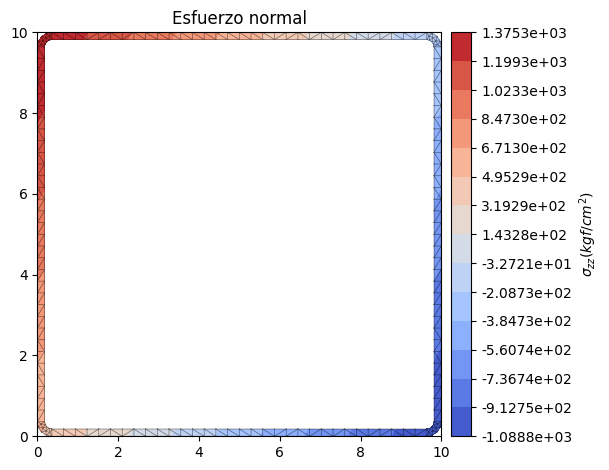

In [35]:
ax = stress.plot_stress(title="Esfuerzo normal",
    colorbar_label=r'$\sigma_{zz} (kgf/cm^{2})$',
    stress="zz",
    normalize=False, 
    
)

# Finally display the plot
plt.show()

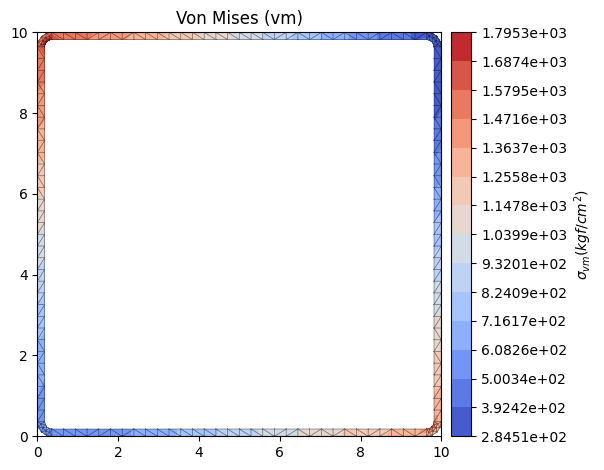

In [36]:
ax = stress.plot_stress(title="Von Mises (vm)",
    colorbar_label=r'$\sigma_{vm} (kgf/cm^{2})$',
    stress="vm",
    normalize=False, 
    
)

# Finally display the plot
plt.show()